In [59]:
# import libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split


In [60]:
# Read the CSV file
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [61]:
# show data
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [62]:
# view number of rows and columns
data.shape

(253680, 22)

# **Data Preprocessing**

In [63]:
# missing values
data.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [64]:
# find the type of data
print(data.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [65]:
# find duplicate data
data.duplicated().sum()

24206

In [66]:
#manage duplicates
data = data.drop_duplicates()


In [67]:
data.duplicated().sum()

0

In [68]:
# Normalize data
df = pd.DataFrame(data)

columns_to_normalize = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age','Education',	'Income']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


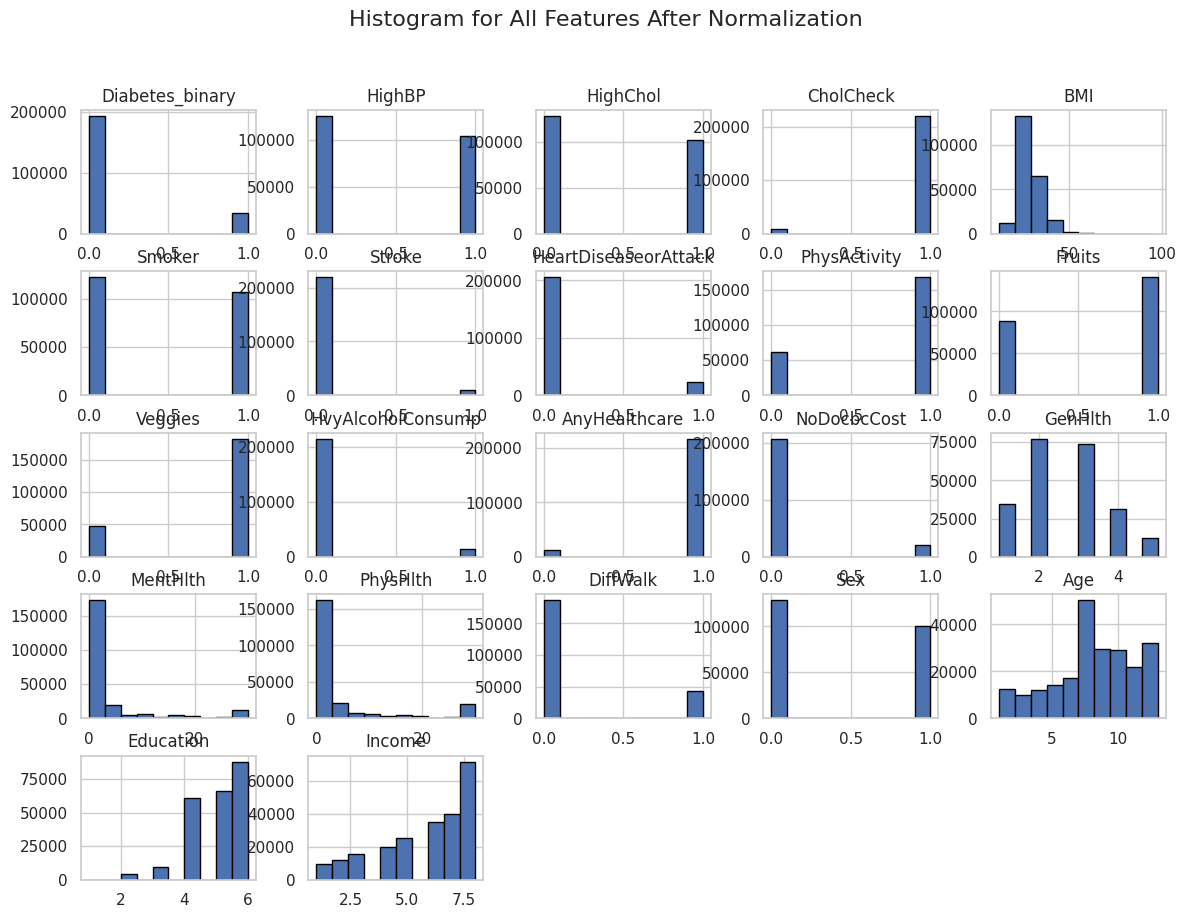

In [69]:
# data visualization (Before normalize)
sns.set(style="whitegrid")

# Histogram for all features
data.hist(figsize=(14, 10), bins=10, edgecolor='black')
plt.suptitle("Histogram for All Features After Normalization", fontsize=16)
plt.show()

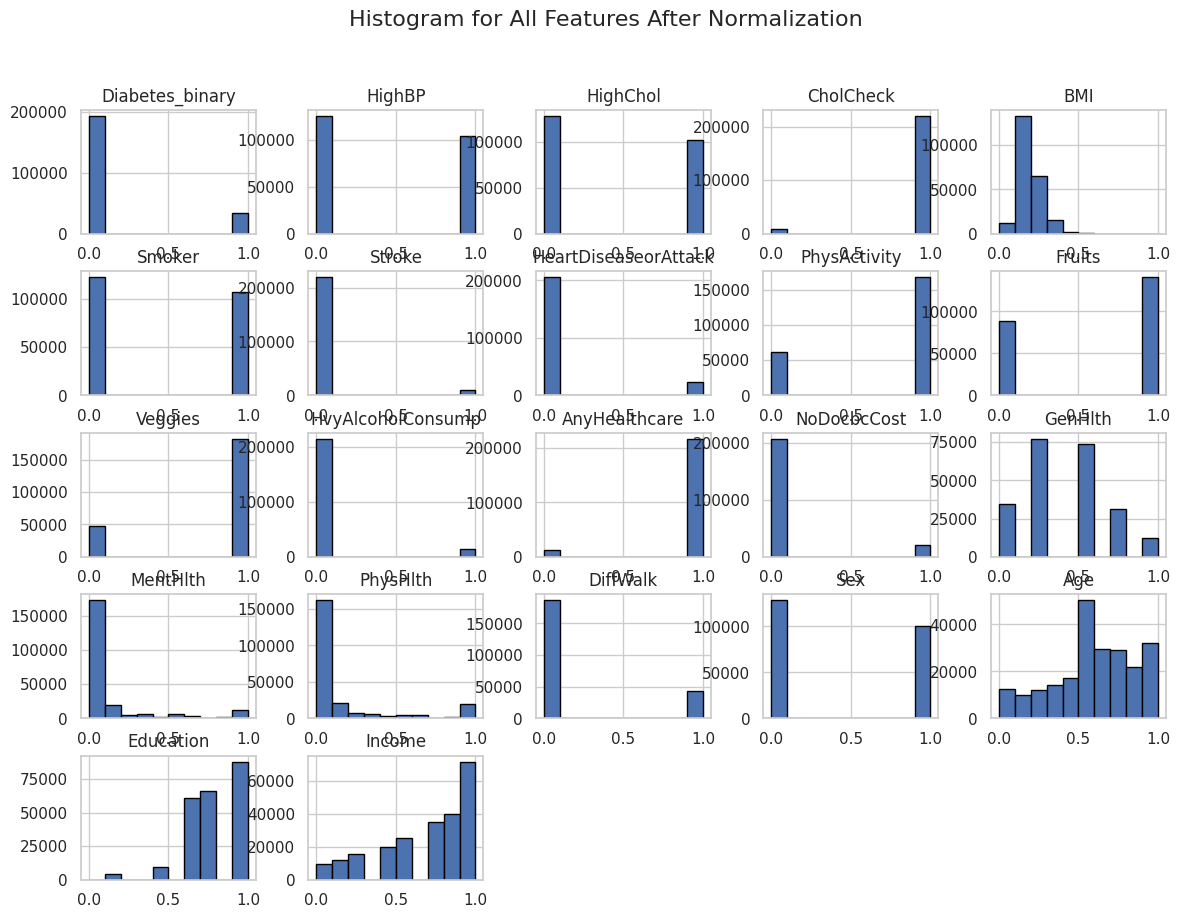

In [70]:
# data visualization (After normalize)

# Histogram for all features
df.hist(figsize=(14, 10), bins=10, edgecolor='black')
plt.suptitle("Histogram for All Features After Normalization", fontsize=16)
plt.show()

# now, all values are between 0 and 1

In [71]:
# divide data into features and labels

x = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [72]:
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [73]:
y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,1.0
253677,0.0
253678,0.0


In [74]:
# Fill NaN with mean for each column

x = x.fillna(x.mean())

In [75]:
# find information gain

information_gain = mutual_info_classif(x, y, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Information Gain': information_gain
}).sort_values(by='Information Gain', ascending=False)

print("Information Gain for Each Feature:")
print(feature_importance)


Information Gain for Each Feature:
                 Feature  Information Gain
0                 HighBP          0.051681
11         AnyHealthcare          0.047997
2              CholCheck          0.046302
13               GenHlth          0.045105
7           PhysActivity          0.042962
9                Veggies          0.038575
1               HighChol          0.038154
8                 Fruits          0.034341
3                    BMI          0.026917
4                 Smoker          0.024940
18                   Age          0.024522
17                   Sex          0.022744
16              DiffWalk          0.021351
19             Education          0.021235
20                Income          0.017706
15              PhysHlth          0.012313
6   HeartDiseaseorAttack          0.011442
5                 Stroke          0.004186
10     HvyAlcoholConsump          0.003361
14              MentHlth          0.003012
12           NoDocbcCost          0.000000


In [76]:
# divide data into train, test and validation

x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.333, random_state=42)

total_samples = x.shape[0]
train_percentage = (x_train.shape[0] / total_samples) * 100
val_percentage = (x_val.shape[0] / total_samples) * 100
test_percentage = (x_test.shape[0] / total_samples) * 100

print("samples in X_train: {:.2f}%".format(train_percentage))
print("samples in X_val: {:.2f}%".format(val_percentage))
print("samples in X_test: {:.2f}%".format(test_percentage))


samples in X_train: 46.69%
samples in X_val: 23.31%
samples in X_test: 30.00%


# **Model Building**

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [78]:
# build the decision tree
from sklearn.model_selection import GridSearchCV

# hyper parameters
dt_model = DecisionTreeClassifier(
    criterion ='gini',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

In [79]:
# train the model
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [ ]:
# predict using validation data

y_pred_val = dt_model.predict(x_val)



# **Model Evaluation**


In [81]:
# accuracy, precision, recall, f1 score

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val,average='weighted')
recall = recall_score(y_val, y_pred_val,average='weighted')
f1 = f1_score(y_val, y_pred_val,average='weighted')

In [82]:
print("Evaluation Metrics on Validation Set ")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

Evaluation Metrics on Validation Set 
Accuracy  : 0.8526
Precision : 0.8170
Recall    : 0.8526
F1 Score  : 0.8066


# **Model Validation**

In [ ]:
# 5-Fold Cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Score : ", cv_scores)
print("Mean Accuracy : ", cv_scores.mean())

print(f"\nMean Cross Validation Accuracy : {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy : {np.std(cv_scores):.4f}")


Cross Validation Score :  [0.85131604 0.85248273 0.8513627  0.8536961  0.85131604]
Mean Accuracy :  0.8520347209258914

Mean Cross Validation Accuracy : 0.8520
Standard Deviation of Cross-Validation Accuracy : 0.0009
